In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)

from textblob import TextBlob

import re

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

import os

print('Modules are imported.')

Modules are imported.


In [4]:
df=pd.read_csv('Datasets/train_covid.csv')
df.head()

,text
0,20 People Test Positive For COVID-19 At SJR Ap...
1,Karadeniz inadı bölgedeki vaka artışında öneml...
2,All countries have indemnity laws - WHO
3,LIVE - WHO officials give an update on COVID-1...
4,LIVE - The National Cathedral bells ring 500 t...


In [5]:
df.columns

Index(['text'], dtype='object')

In [6]:
text = df.copy()
text.head()

,text
0,20 People Test Positive For COVID-19 At SJR Ap...
1,Karadeniz inadı bölgedeki vaka artışında öneml...
2,All countries have indemnity laws - WHO
3,LIVE - WHO officials give an update on COVID-1...
4,LIVE - The National Cathedral bells ring 500 t...


In [7]:
text.shape

(5398, 1)

In [8]:
text.isna().sum()

text    0
dtype: int64

In [9]:
# data preprocessing
for i in range(text.shape[0]) :
    text['text'][i] = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(#[A-Za-z0-9]+)", " ", text['text'][i]).split()).lower()
text['text'].head()

0    20 people test positive for covid 19 at sjr ap...
1    karadeniz inad b lgedeki vaka art nda nemli et...
2                all countries have indemnity laws who
3    live who officials give an update on covid 19 ...
4    live the national cathedral bells ring 500 tim...
Name: text, dtype: object

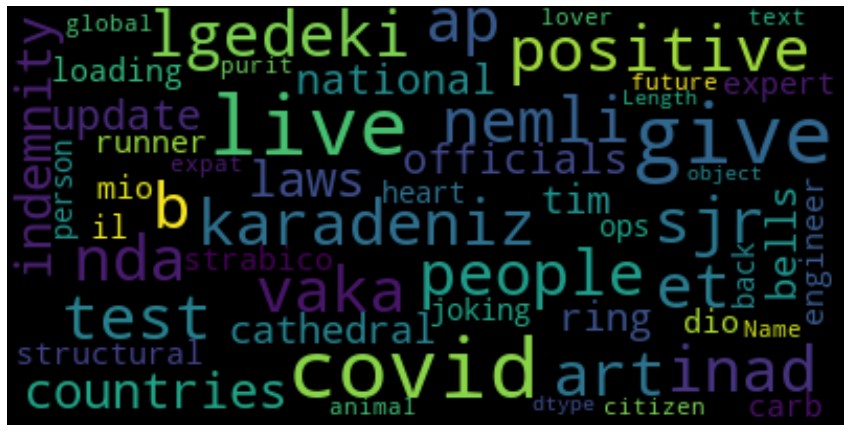

In [10]:
def show_wordcloud(data , title = None):
    wordcloud = WordCloud(background_color='black',stopwords=stopwords,max_words=200,max_font_size=40).generate(str(data))
  
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    plt.title(title, size = 25)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

show_wordcloud(text['text'])

In [11]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [12]:
#Removing Stop Words
text['text'] = text['text'].apply(lambda text: ' '.join([word for word in text.split() if word not in stopwords]))
text['text'].head()

0    20 people test positive covid 19 sjr apartment...
1    karadeniz inad b lgedeki vaka art nda nemli et...
2                             countries indemnity laws
3    live officials give update covid 19 global cas...
4    live national cathedral bells ring 500 times 5...
Name: text, dtype: object

In [13]:
text['sentiment'] = ' '
text['polarity'] = None
for i,texts in enumerate(text.text) :
    blob = TextBlob(texts)
    text['polarity'][i] = blob.sentiment.polarity
    if blob.sentiment.polarity > 0 :
        text['sentiment'][i] = 'positive'
    elif blob.sentiment.polarity < 0 :
        text['sentiment'][i] = 'negative'
    else :
        text['sentiment'][i] = 'neutral'
text.head()

,text,sentiment,polarity
0,20 people test positive covid 19 sjr apartment...,positive,0.227273
1,karadeniz inad b lgedeki vaka art nda nemli et...,neutral,0.0
2,countries indemnity laws,neutral,0.0
3,live officials give update covid 19 global cas...,positive,0.068182
4,live national cathedral bells ring 500 times 5...,positive,0.136364


neutral     3685
positive    1304
negative     409
Name: sentiment, dtype: int64


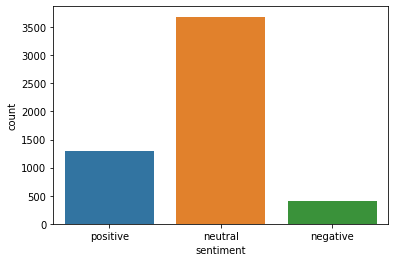

In [14]:
print(text.sentiment.value_counts())
sns.countplot(x='sentiment', data = text);

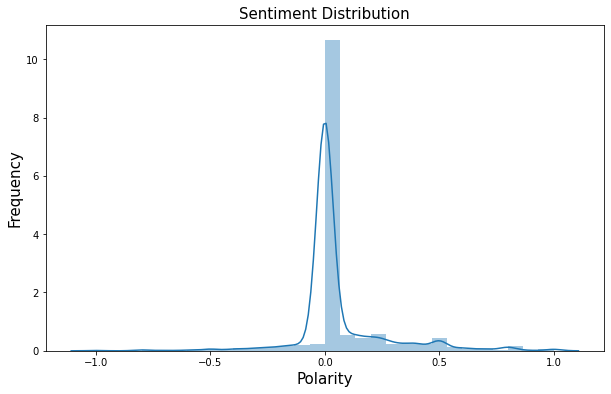

In [15]:
plt.figure(figsize=(10,6))
sns.distplot(text['polarity'], bins=30)
plt.title('Sentiment Distribution',size = 15)
plt.xlabel('Polarity',size = 15)
plt.ylabel('Frequency',size = 15)
plt.show();

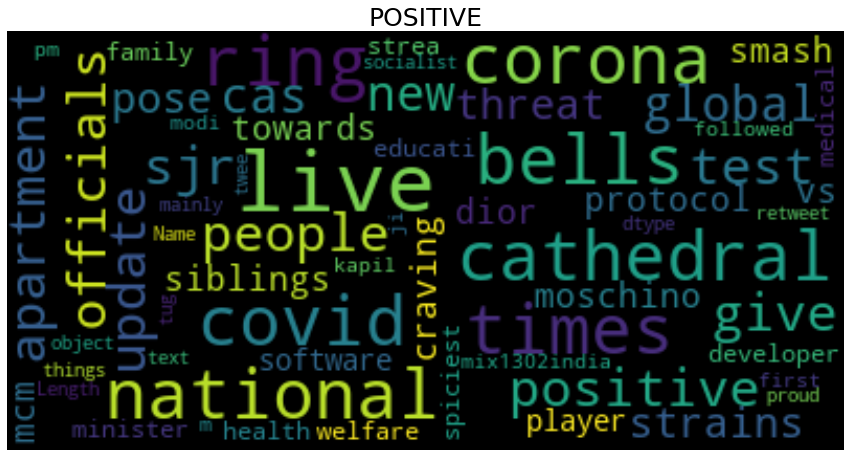

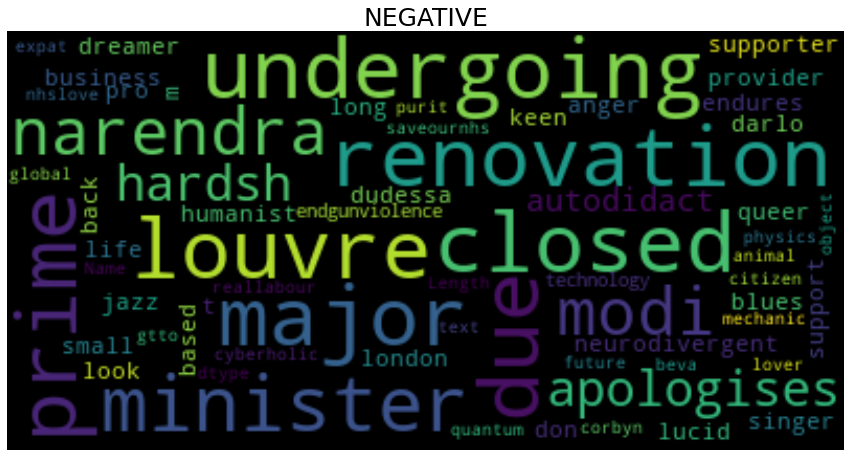

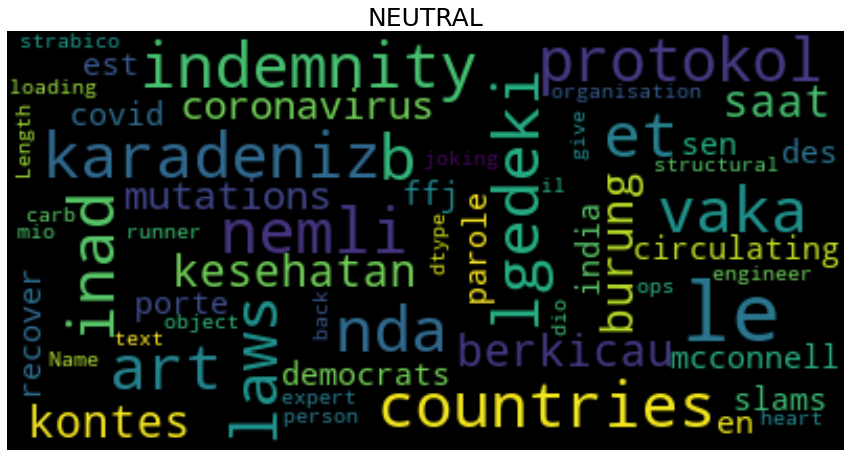

In [22]:
pos = text['text'][text['sentiment'] == 'positive']
show_wordcloud(pos , 'POSITIVE')

neg = text['text'][text['sentiment'] == 'negative']
show_wordcloud(neg , 'NEGATIVE')

neutral = text['text'][text['sentiment'] == 'neutral']
show_wordcloud(neutral , 'NEUTRAL')

In [23]:
words = []
words = [word for i in text.text for word in i.split()]

In [24]:
freq = Counter(words).most_common(30)
freq = pd.DataFrame(freq)
freq.columns = ['word', 'frequency']
freq.head()

,word,frequency
0,de,1113
1,y,543
2,s,528
3,la,489
4,en,444


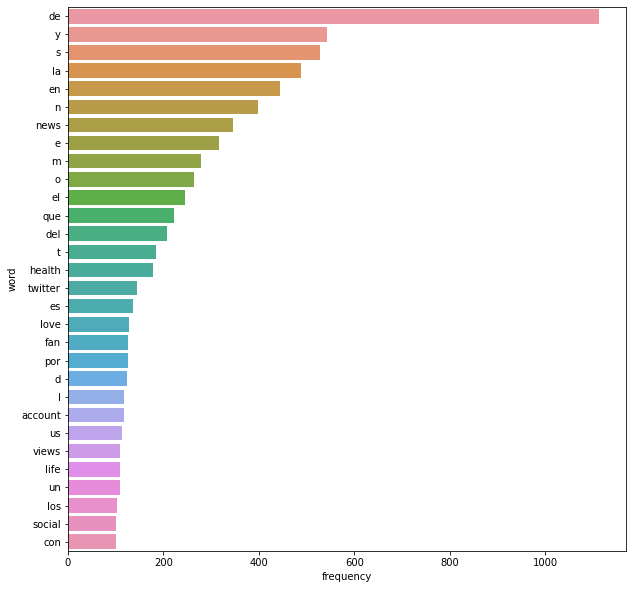

In [25]:
plt.figure(figsize = (10, 10))
sns.barplot(y="word", x="frequency",data=freq);

(0.0, 1000.0)

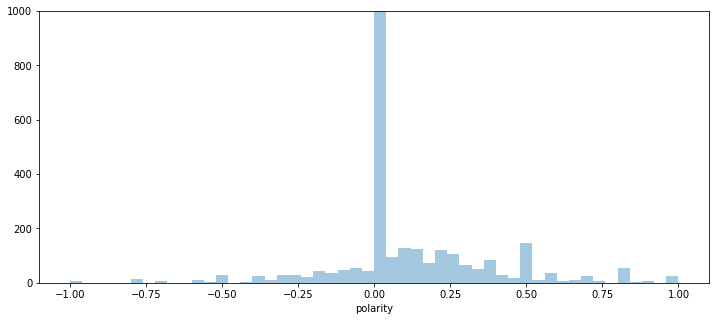

In [20]:
fig = plt.figure(figsize=(12,5))
sns.distplot(text['polarity'],kde = False)
plt.ylim(0, 1000)

In [21]:
# draw a pie chart to show the ratio of 'Negative', 'Neutral' and 'Positive' tweets
fig = plt.figure(figsize=(6,6))
labels = 'Negative', 'Neutral', 'Positive'
sizes = df.groupby('sentiment').Text.count().values
colors = ['gold', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0) 

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.2f%%', shadow=True, startangle=140)
plt.title('The Proportion of Three Sentiments')
plt.show()

KeyError: 'sentiment'

<Figure size 432x432 with 0 Axes>

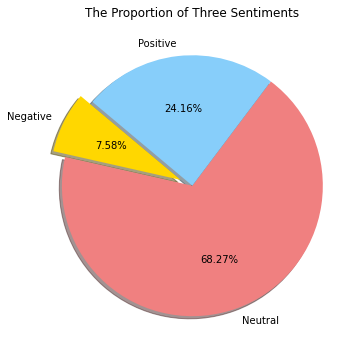

In [23]:
# draw a pie chart to show the ratio of 'Negative', 'Neutral' and 'Positive' tweets
fig = plt.figure(figsize=(6,6))
labels = 'Negative', 'Neutral', 'Positive'
sizes = text.groupby('sentiment').text.count().values
colors = ['gold', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0) 

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.2f%%', shadow=True, startangle=140)
plt.title('The Proportion of Three Sentiments')
plt.show()

In [30]:
add_stopwords = ['day','like','go','one','today','let','get',
 '2', '1','3','4','5','take','make','think','want','way',
'see','still', 'via', 'now','much', 'even','watch','क',
 'all','really','thing', 'every','around','here','made',
 'also','part','total', 'things',  'little','getting',
 'last','essential','long', 'another', 'look', 'next','there',
 'people','time','new','thank','need','good','going','know',
 'week','everyone','live','love','right','home','us','stay','re',
'help', 'work', 'quarantine', 'life', 'keep', 'york','don', 'modi', 'narendra','sjr','vs','dior','dtype','gtto','jazz','mcm','educati','ji']

# Add meaningless words into stopwords
for i in range(len(add_stopwords)):
    STOPWORDS.add(add_stopwords[i])
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

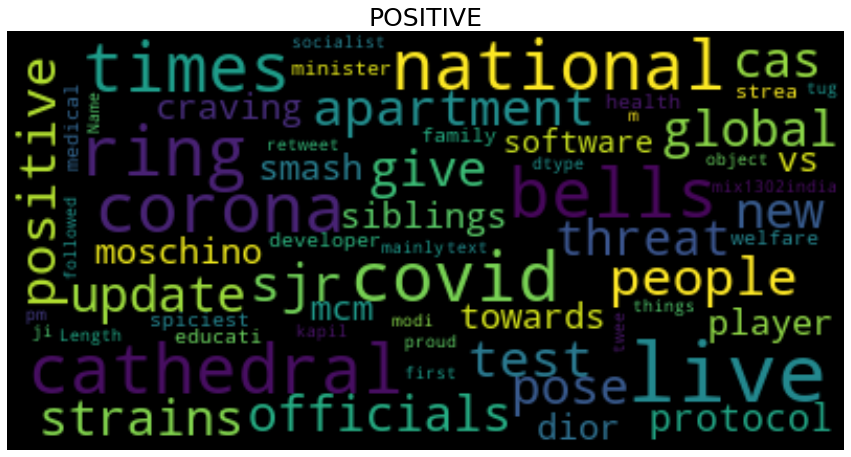

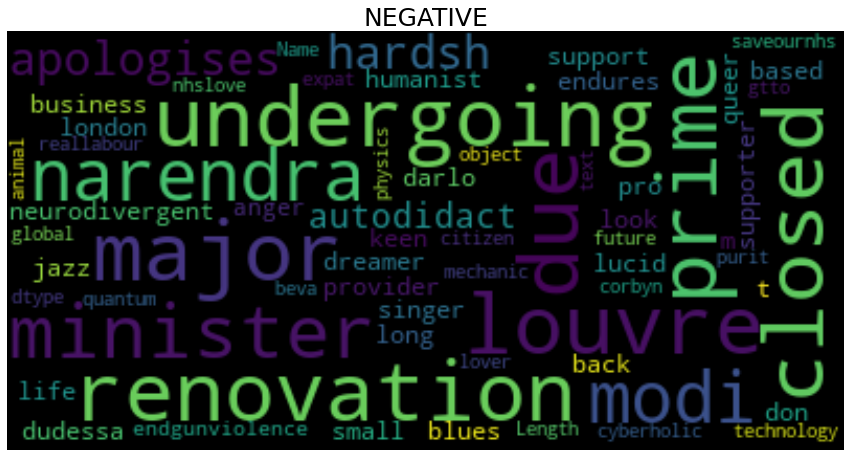

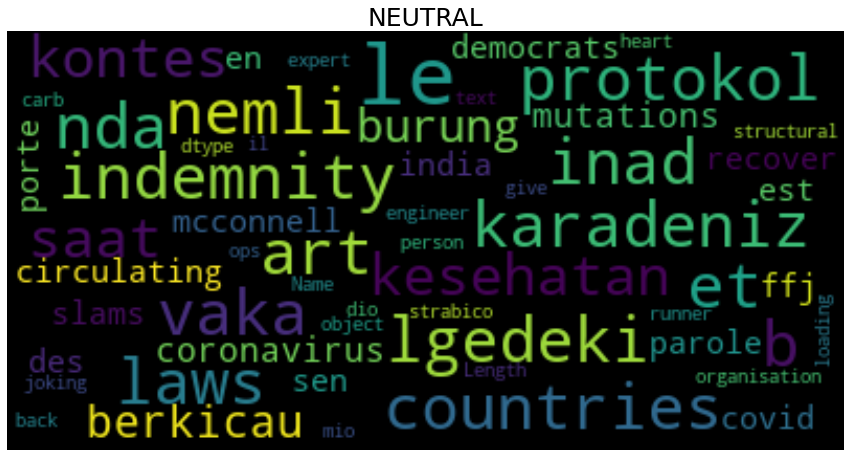

In [25]:
pos = text['text'][text['sentiment'] == 'positive']
show_wordcloud(pos , 'POSITIVE')

neg = text['text'][text['sentiment'] == 'negative']
show_wordcloud(neg , 'NEGATIVE')

neutral = text['text'][text['sentiment'] == 'neutral']
show_wordcloud(neutral , 'NEUTRAL')

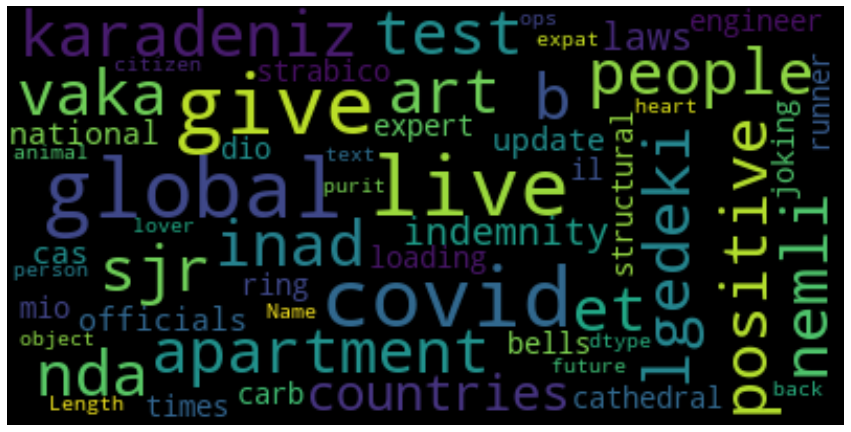

In [26]:
def show_wordcloud(data , title = None):
    wordcloud = WordCloud(background_color='black',stopwords=stopwords,max_words=100,max_font_size=40).generate(str(data))
  
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    plt.title(title, size = 25)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

show_wordcloud(text['text'])

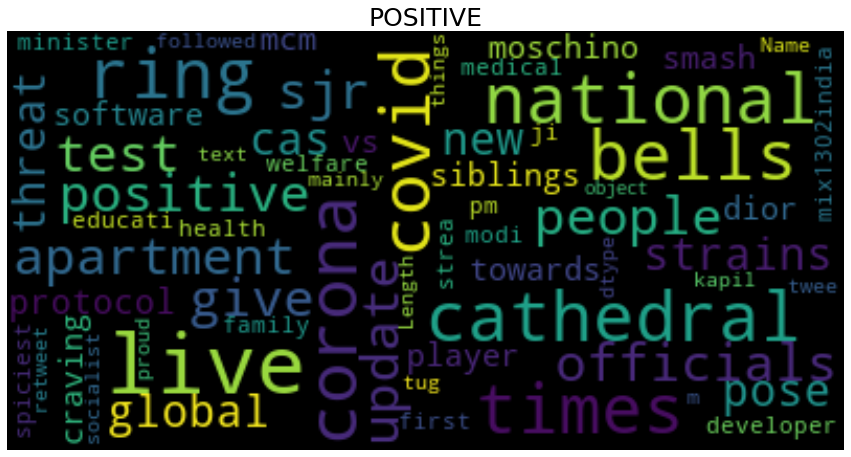

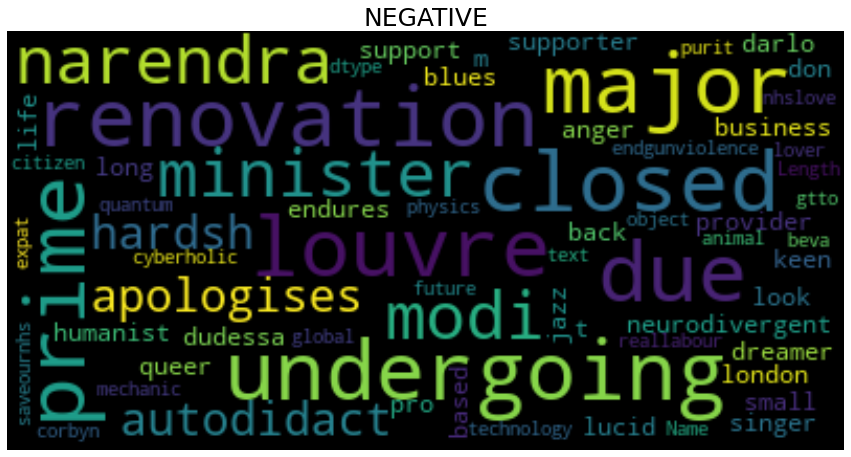

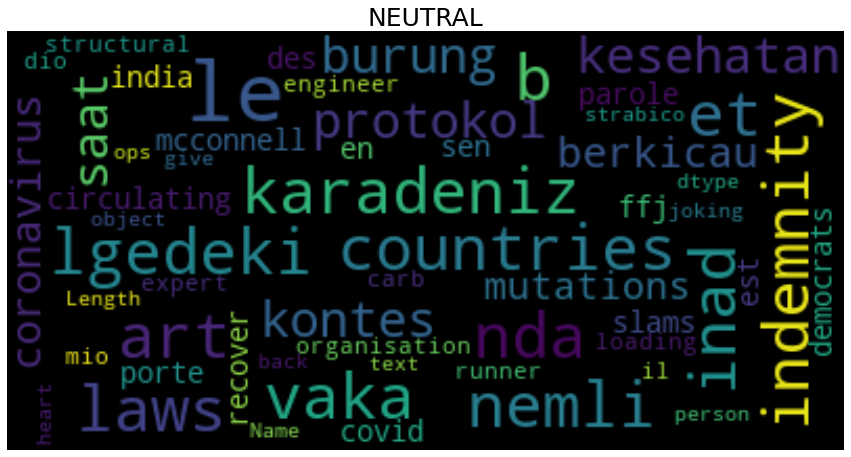

In [27]:
pos = text['text'][text['sentiment'] == 'positive']
show_wordcloud(pos , 'POSITIVE')

neg = text['text'][text['sentiment'] == 'negative']
show_wordcloud(neg , 'NEGATIVE')

neutral = text['text'][text['sentiment'] == 'neutral']
show_wordcloud(neutral , 'NEUTRAL')

In [28]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 